# Lab On You Own: Run Expectancy and Decision Making

## Should you attempt to steal bases? Should you bunt? 

Historically, baseball teams utilized base stealing and the sacrifice bunts to "manufacture" runs.  The concept was to risk (or outright give up, in the case of a bunt) an out to gain a base.  Without a notion of Run Expectancy, we don't really have a way to tell if this is a worthwhile risk/trade-off.

## Setup (Do Not Change)

In [ ]:
%run ../../utils/notebook_setup.py

from datascience import Table, are
import numpy as np

# custom functions that will help do some simple tasks
from datascience_utils import *

In [ ]:
run_expectancy = Table.read_table("re_2017.csv")
run_expectancy.show(10)

# Helper function for extracting an RE value
def get_matrix_val(table, outs, base):
    for o, b, v in table.to_array():
        if outs == o and base == b:
            return v

## 1. Base Stealing

We can perform an analysis of the strategy of stealing bases by computing a success rate for a base stealer that makes the run expectancy of the steal attempt equivalent to the run expectancy of the current state.

Take the current state's run expectancy as $\mathit{RE}_{\text{Current}}$.  Take the base stealer's probability of successfully stealing the base as $p_{\text{SB}}$.  


The run expectancy of the steal attempt is computed by taking the run expectancy of the two possible outcomes (successful steal and caught stealing) and balancing them by the likelihood they happen:
$$
    \text{RE}_{\text{Steal Attempt}} = \mathit{RE}_{\text{SB}} \cdot p_{\text{SB}} + 
        \mathit{RE}_{\text{CS}} \cdot (1 - p_{\text{SB}}) 
$$

### A. Compute the equalizing probability


Set $\mathit{RE}_{\text{Current}} = \text{RE}_{\text{Steal Attempt}}$ and solve for $p_{\text{SB}}$ using the above formula to get the formula for the equalizing probability.

Create a function that computes the equalizing probability.

_Answer_

$$
    p_{\text{SB}} = \frac{\mathit{RE}_{\text{Current}} - \mathit{RE}_{\text{CS}}}{\mathit{RE}_{\text{SB}} - \mathit{RE}_{\text{CS}}}
$$

In [ ]:
def equalizing_probability(re_curr, re_sb, re_cs):
    p_sb = ...
    return p_sb

### B. Print out the equalizing probability

Complete the function to show the equalizing probability for a base stealing situation for various out situations.

The function will take these inputs:
+ RE table
+ Starting baserunner situation
+ Caught stealing baserunner situation
+ Stolen base baserunner situation.

For each out value, the function needs to...
1. Use `get_matrix_val` to compute the run expectancies for the current situation, a stolen base, and caught stealing
2. Compute the equalizing probability.
3. Print the result

In [ ]:
def analyze_steals(re_table, start_base, sb_base, cs_base):
    print(f"Steal situation: {start_base} to {sb_base}")
    for outs in [0, 1, 2]:
        # Get current run expectancy
        re_curr = ...
        # Get caught stealing run expectancy (0 if CS is 3rd out)
        if outs < 2:
            re_cs = ...
        else:
            re_cs = ...
        # Get successful steal run expectancy
        re_sb = ...
        
        # Compute equalizing probability
        p_sb = equalizing_probability(re_curr, re_sb, re_cs)
        print(f"Outs: {outs}  P(SB): {p_sb:.3f}")
    print()

### C. Analyze Base Stealing

Consider three base stealing situations: 
+ "1st" to "2nd"
+ "2nd" to "3rd",
+ "1st and 2nd" to "2nd and 3rd" (ie. a double steal).  Assume the lead runner is caught stealing. 

Use `analyze_steals` to print the results each of the three situations.  The first situation is given.

To check if you're doing the above correct, the result for that first situation should be
```
Steal situation: 1st to 2nd
Outs: 0  P(SB): 0.695
Outs: 1  P(SB): 0.683
Outs: 2  P(SB): 0.700
```

In [ ]:
print("Run Expectancy Stolen Base Probabilities")
print("========================================")

start_base = "1st"
sb_base = "2nd"
cs_base = "None on"
analyze_steals(run_expectancy, start_base, sb_base, cs_base)

...

_Questions_

1. For a single base stealer, ie 1st or 2nd, about what success probability typically balances out RE for most out situations?
2. What does this RE analysis say about a runner at second stealing with 0 or 2 outs?  Does this make sense based on what we've studied so far with respect to run expectancy and the run scoring process in baseball?
3. What does this analysis suggest about the risk-reward of a double steal?

## 2. Bunting

For bunting, we take a simpler view.  Assume we can execute the bunt strategy 100% of the time with a regular hitter (ie. not a pitcher at the plate).  Should we use this strategy?


### A. Print the Run Expectancy Comparison

Complete a function `analyze_bunt` that prints a string comparing the run expectancy bunting.   The function will take as inputs:
    + RE table
    + Starting baserunner situation
    + Ending baserunner situation following successful bunt

For each out value of 0 and 1 (a bunt with 2 outs makes no sense), the function will get the current run expectancy and the run expectancy following the bunt and then print the results.  Remember, when the bunt is complete, there is an extra out.

In [ ]:
def analyze_bunt(table, start_base, end_base):
    print(f"Bunting situation: {start_base} to {end_base}")
    for outs in [0, 1]:
        re_curr = ...
        re_bunt = ...
        print(f"Outs: {outs} - {re_curr:.3f} vs. {re_bunt:.3f}")
    print()

### B. Analyze Bunting
 
Consider the three baserunner situations: "1st", "2nd", and "1st and 2nd".  Use `analyze_bunt` to see how run expectancy evaluates the bunting strategy.

The first situation is given.

To check if you're doing the above correct, the result for that first situation should be
```
Bunting situation: 1st
Outs: 0 - 0.914 vs. 0.718
Outs: 1 - 0.526 vs. 0.331
```

In [ ]:
print("Run Expectancy Bunting Comparisons")
print("==================================")

start_base = "1st"
end_base = "2nd"
analyze_bunt(run_expectancy, start_base, end_base)

...

_Questions_

1. According to run expectancy, should teams bunt?  Make sure to note that we made the _very_ optimistic assumption that the bunt is successful 100% of the time. 
2. What does this tell us about the value of an out compared to the value of moving a runner over?
3. What would happen if we were to consider the value of a pitcher bunting?  Does this analysis make sense as is or would it have to change?  Remember, pitchers are terrible hitters.

## 3. End-of-Game Win Probability

Let's consider bunts or steals in the context of an end-of-game strategy.  Let's say we are the home team batting in the last half of the ninth inning (or later) and the game is tied.  We get a runner on base.  Should we bunt, steal, or hit away?

In this situation we are no longer interested in expected runs but rather win probability.  And in this case, our probability of winning is just the probability of scoring more than one run.  We can compute a run/win probability matrix instead of a run expectancy matrix and use that to analyze the strategies.

### A. Win Probability Matrix

Complete the function `prob_at_least_one_run` to help build the win probability matrix.  We built the Run Expectancy Matrix by using a group by and averaging over values in the group:
```
run_expectancy = retro_pre9.select('Outs', 'Start_Bases', 'Runs_ROI').\
    group(['Outs', 'Start_Bases'], collect=np.mean)
```
Instead of using `np.mean`, we will use `prob_at_least_one_run` that will compute
$$
    \text{Probability of at least 1 run from game state $S$}
        = \frac{\text{# of times from state $S$ scoring $\geq$ 1 run}}
                {\text{Total # of times in state $S$}}
$$

Our interest here is a situation where we don't need to maximize total expected runs, just our chance of scoring at least 1 run.  Hence we compute this probability as a Win Probability Matrix.  

**Comment**: there will be win probabilities for all sorts of inning, out, base state, score state combinitions.  We're picking a simple situation: game tied in the bottom of the ninth.

In [ ]:
# Win probability when needing 1 run
def prob_at_least_one_run(runs):
    return ...

In [ ]:
### We need to reload all the Retrosheet data so this is all the code to redo
### the work from the demo

# Load Data
col_names = [
    'EVENT_ID', 'INN_CT', 'BAT_HOME_ID', 'EVENT_CD', 'OUTS_CT', 'BAT_ID', 
    'BAT_LINEUP_ID', 'BAT_EVENT_FL', 'START_BASES_CD', 'END_BASES_CD', 
    'EVENT_OUTS_CT', 'EVENT_RUNS_CT', 'FATE_RUNS_CT', 'INN_NEW_FL']

retro = Table.read_table(
    'retrosheet_events-2017.csv.gz', sep=',', usecols=col_names)

new_col_names = [
    'ID', 'Inning', 'Half-Inning', 'Event_Type', 'Outs', 'Batter_ID', 
    'Lineup_Order', 'PA_Flag', 'Start_Bases', 'End_Bases', 'Event_Outs', 
    'Event_Runs', 'Future_Runs', 'New_Inning']
retro.relabel(col_names, new_col_names)

# Replace the numeric code with a string code
base_runner_codes = {
    0: "None on",  # No one on
    1: "1st",  # runner on 1st
    2: "2nd",  # runner on 2nd
    3: "1st and 2nd",  # runners on 1st & 2nd
    4: "3rd",  # runner on 3rd
    5: "1st and 3rd",  # runners on 1st & 3rd
    6: "2nd and 3rd",  # runners on 2nd & 3rd
    7: "Bases Loaded"  # bases loaded
}
retro['Start_Bases'] = replace(retro, 'Start_Bases', base_runner_codes)
retro['End_Bases'] = replace(retro, 'End_Bases', base_runner_codes)

# Add runs remainder of inning
retro['Runs_ROI'] = retro['Future_Runs'] + retro['Event_Runs']

# Filter to only PAs and pre-ninth inning
retro = retro.where('PA_Flag', value_or_predicate="T")
retro_pre9 = retro.where('Inning', are.below(9))

#############################################
# Build the Win Probability Matrix
#############################################
win_prob = retro_pre9.select('Outs', 'Start_Bases', 'Runs_ROI').\
    group(['Outs', 'Start_Bases'], prob_at_least_one_run)
win_prob.relabel('Runs_ROI prob_at_least_one_run', 'WP')

The Win Probability Matrix should look like this:
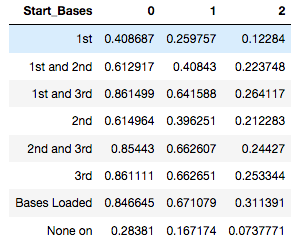

In [ ]:
win_prob.pivot('Outs', 'Start_Bases', values='WP', collect=np.sum)

### B. End-of-Game Base Stealing

Reuse your code from 1.C but replace the Run Expectancy Matrix with the newly computed Win Probability Matrix.

In [ ]:
print("Win Probability Stolen Base Probabilities")
print("=========================================")

...

_Questions_
1. What changed?  
2. What do the new results say about getting a runner into scoring position in order to win?

### C. End-of-Game Base Bunting

Reuse your code from 2.B but replace the Run Expectancy Matrix with the newly computed Win Probability Matrix.

In [ ]:
print("Win Probability Bunting Comparisons")
print("===================================")

...

_Questions_
1. Does it now make sense to bunt when you only need 1 run?
2. What does the analysis say about the value of an out now in an end-of-game situation?
3. Would you bunt, steal, or hit away?

## 4. Final Questions

_Questions_
1. What are the limits of kind of analysis?  What kind of caveats are there?  To what kind of hitter and team circumstances does this analysis apply?  Can this analysis still be useful?
2. Brainstorm some ways you might try to augment the analysis to improve it.